In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/2022-world-cup-stats/2022worldcup.csv")

In [3]:
df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Argentina,24,27.5,57.4,7,77,690,7.7,15,8,...,1.96,1.04,3.00,1.43,2.48,1.96,1.00,2.97,1.47,2.48
1,Australia,20,27.8,37.8,4,44,360,4.0,3,3,...,0.75,0.75,1.50,0.75,1.50,0.58,0.48,1.06,0.58,1.06
2,Belgium,20,29.7,57.0,3,33,270,3.0,1,1,...,0.33,0.33,0.67,0.33,0.67,1.57,1.27,2.85,1.57,2.85
3,Brazil,26,27.6,56.2,5,55,480,5.3,8,6,...,1.50,1.13,2.62,1.31,2.44,2.24,1.54,3.79,2.09,3.64
4,Cameroon,22,27.2,41.7,3,33,270,3.0,4,4,...,1.33,1.33,2.67,1.33,2.67,1.14,0.66,1.80,1.14,1.80


In [6]:
x=df[["Age","Poss"]]

In [7]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [8]:
model=KMeans(4)

In [9]:
model.fit(x)

KMeans(n_clusters=4)

In [10]:
tahmin=model.predict(x)

In [11]:
x["Cluster"]=tahmin

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Poss')

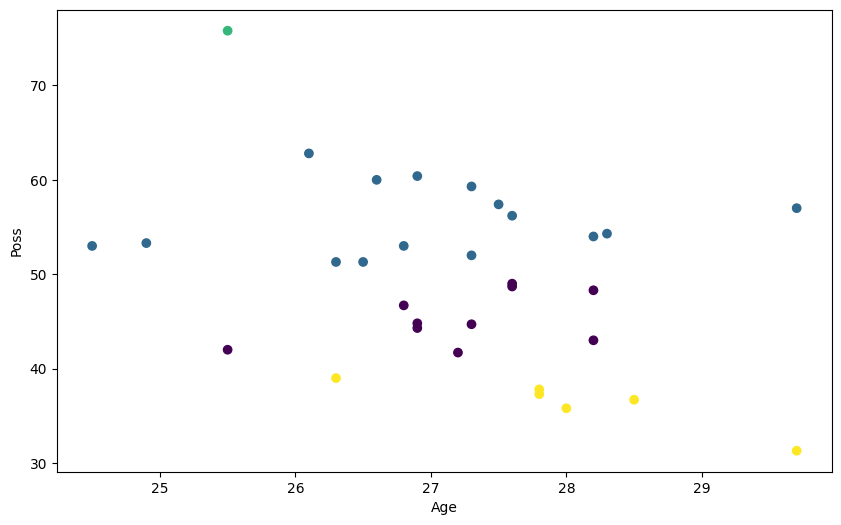

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(x.Age, x.Poss, c=tahmin)

plt.xlabel('Age')

plt.ylabel('Poss')

In [15]:

wcss=[]

for i in range(1,10):

    kmeans=KMeans(i)

    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

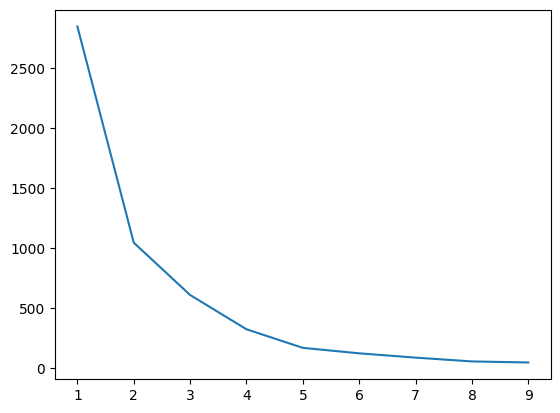

In [16]:
plt.plot(range(1,10),wcss);

In [17]:
from yellowbrick.cluster import KElbowVisualizer

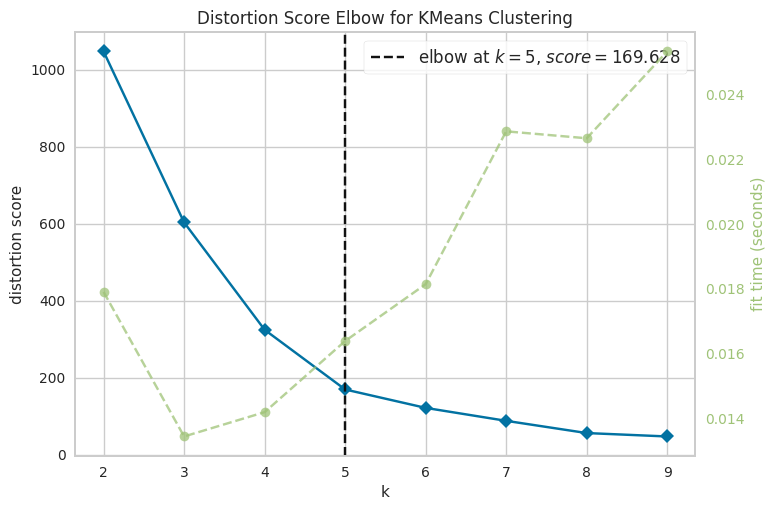

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
km=KMeans()

visualizer=KElbowVisualizer(km,k=(2,10))

visualizer.fit(x)

visualizer.show()

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
data=linkage(x,method="ward",metric="euclidean")

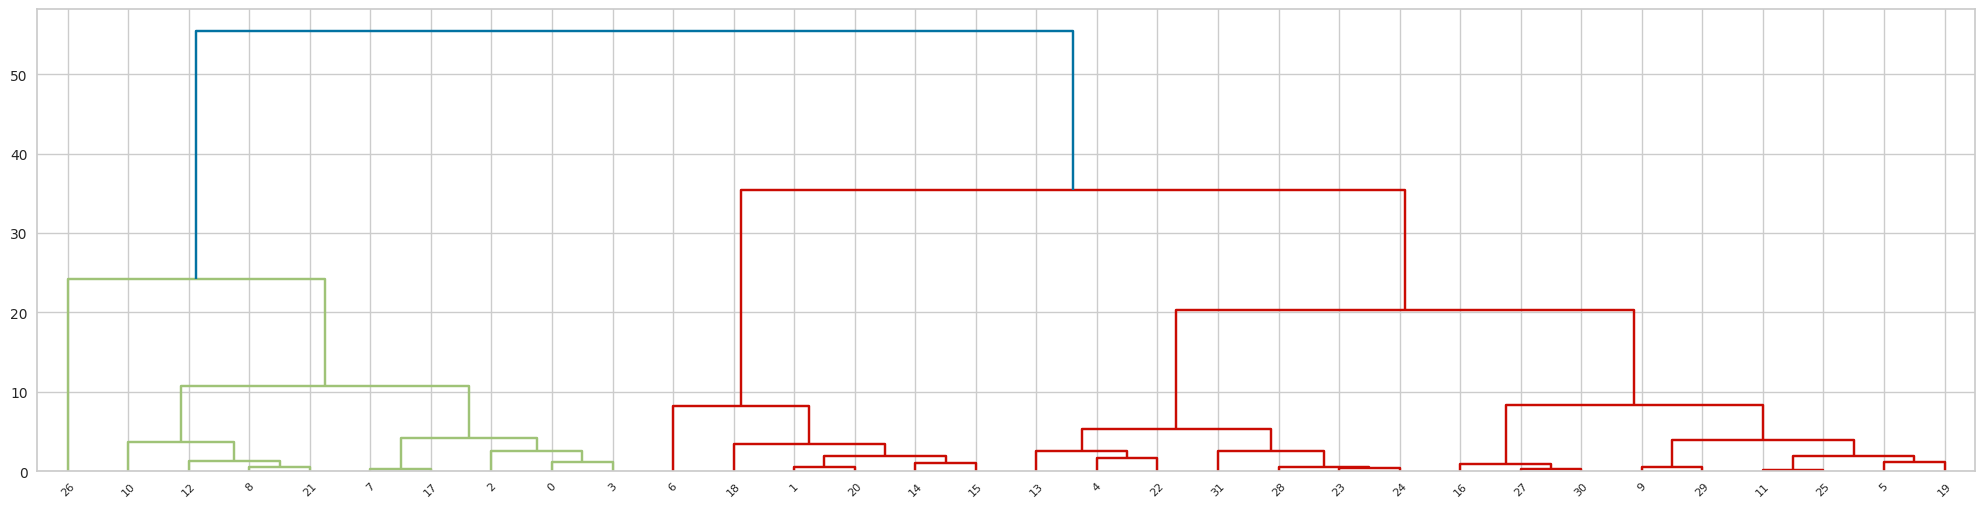

In [22]:
plt.figure(figsize=(25,6))

dendrogram(data);